In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'numpy'

# Part 1: Data Understanding and Preparation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


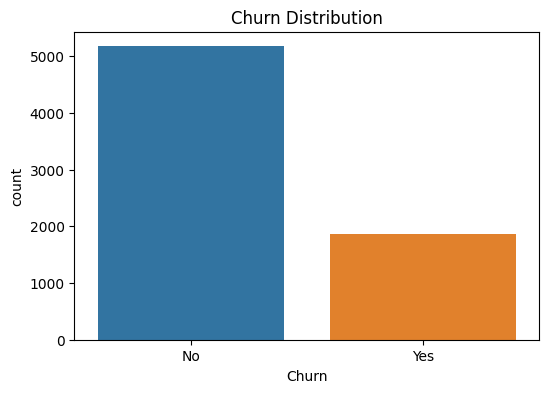

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

/tmp/ipykernel_48/830575513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [ ]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


In [ ]:
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Part 2: Model Implementation

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_logreg = log_reg.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = random_forest.predict(X_test)

# Part 3: Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score


In [ ]:
print("\nLogistic Regression - Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg):.4f}")


Logistic Regression - Performance Metrics:
Accuracy: 0.8219
Precision: 0.6871
Recall: 0.6005
F1 Score: 0.6409


In [ ]:
print("\nK-Nearest Neighbors (KNN) - Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")



K-Nearest Neighbors (KNN) - Performance Metrics:
Accuracy: 0.7729
Precision: 0.5782
Recall: 0.5255
F1 Score: 0.5506


In [ ]:
print("\nDecision Tree - Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")


Decision Tree - Performance Metrics:
Accuracy: 0.7715
Precision: 0.5794
Recall: 0.4987
F1 Score: 0.5360


In [ ]:
print("\nRandom Forest - Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")


Random Forest - Performance Metrics:
Accuracy: 0.7970
Precision: 0.6733
Recall: 0.4531
F1 Score: 0.5417


In [ ]:
from sklearn.metrics import roc_curve, auc

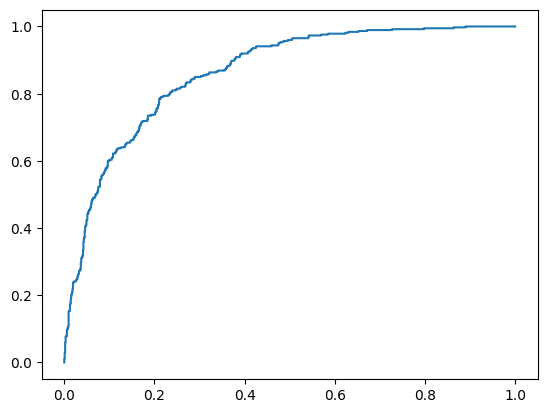

In [ ]:
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc(fpr_logreg, tpr_logreg):.2f})')

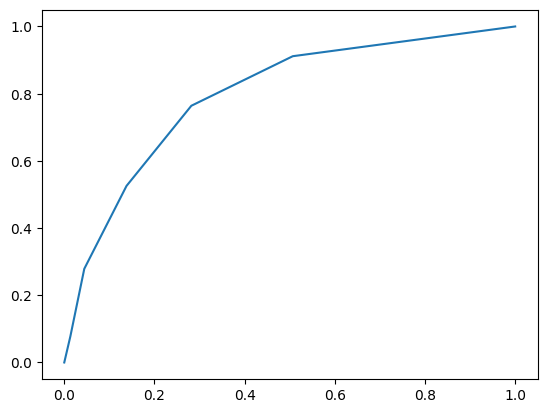

In [ ]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc(fpr_knn, tpr_knn):.2f})')

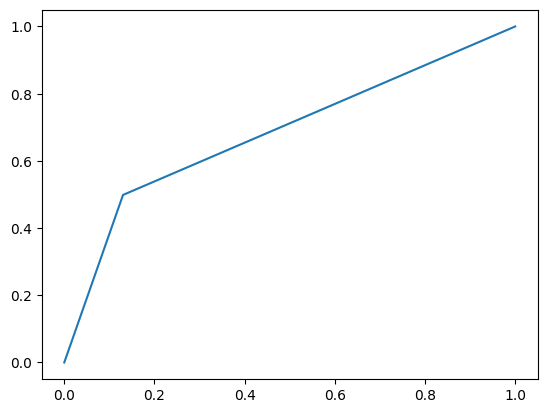

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:,1])
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})')

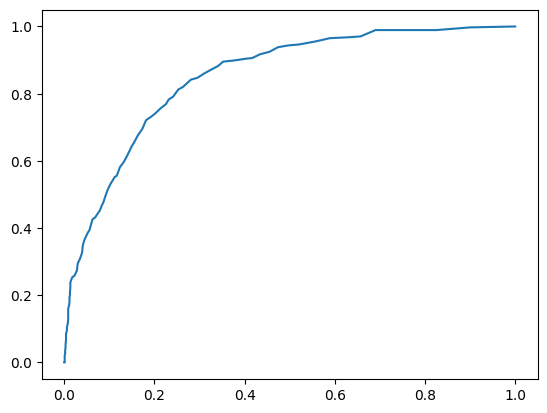

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')

# Part 4: Insights and Conclusion

**Customer Churn Prediction: Summary Report**

Key Factors that Influence Customer Churn:

Tenure: Customers who stay longer are less likely to leave.

Monthly Charges: Higher charges may lead to more churn due to cost sensitivity.

Total Charges: More spending could indicate a stronger investment in the service.

Contract Type: Month-to-month customers are more likely to churn.

Payment Method: Automated payments reduce churn.

Services Used: More services reduce the chance of churn.

Support Interactions: Frequent negative interactions can lead to churn.

**Recommended Model**

We recommend using Random Forest for deployment. Here's why:

Best Performance: It gave the highest accuracy and overall performance.

Handles Complexity Well: It works well with many features and is less likely to overfit.

Feature Insights: It helps us see which factors are most important in predicting churn

**Business Implications of False Positives and False Negatives:**

False Positives (FP): When the model wrongly predicts churn, the company might waste money on retention efforts that aren’t needed. This can lead to higher costs and customer dissatisfaction.

False Negatives (FN): When the model misses customers who are about to churn, the company loses out on potential retention efforts, leading to lost revenue.

Trade-off: We need to focus on reducing false negatives because losing customers is more costly than offering unnecessary retention deals.

**Limitations and Improvements:**

Data Limitations:

The dataset may not cover all factors influencing churn, like external competition.

Model Limitations:

Random Forest is powerful but hard to explain, which may be an issue for some stakeholders.

The model can overfit if parameters are not tuned well.

Data Imbalance: If there are more non-churning customers than churners, the model may predict "no churn" more often. Balancing the dataset can help.

Improvements:

Better Features: More customer data like feedback or competitor info can improve the model.

Update Regularly: Customer behavior changes, so we need to update the model frequently.